In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [2]:
#import Some data to play with
fraud_check=pd.read_csv("Fraud_check.csv")
fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
#create a cloumn Income to basis of taxable.income is >=30000 and <=30000.
fraud_check.loc[fraud_check['Taxable.Income']>=30000,"Income"]="Good"
fraud_check.loc[fraud_check['Taxable.Income']<=30000,"Income"]="Risky"

In [4]:
fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [5]:
first_column=fraud_check.pop('Taxable.Income')
first_column

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable.Income, Length: 600, dtype: int64

In [6]:
fraud_check.insert(0,'Taxable.Income',first_column)


In [7]:
fraud_check

,Taxable.Income,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Income
0,68833,NO,Single,50047,10,YES,Good
1,33700,YES,Divorced,134075,18,YES,Good
2,36925,NO,Married,160205,30,YES,Good
3,50190,YES,Single,193264,15,YES,Good
4,81002,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,76340,YES,Divorced,39492,7,YES,Good
596,69967,YES,Divorced,55369,2,YES,Good
597,47334,NO,Divorced,154058,0,YES,Good
598,98592,YES,Married,180083,17,NO,Good


In [9]:
#use labelencoder function  in categorical column  to cover string data into numerical data

label_encoder=preprocessing.LabelEncoder()
fraud_check['Undergrad']=label_encoder.fit_transform(fraud_check['Undergrad'])
fraud_check['Marital.Status']=label_encoder.fit_transform(fraud_check['Marital.Status'])
fraud_check['Urban']=label_encoder.fit_transform(fraud_check['Urban'])
fraud_check['income']=label_encoder.fit_transform(fraud_check['Income'])


In [10]:
fraud_check

,Taxable.Income,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Income,income
0,68833,0,2,50047,10,1,Good,0
1,33700,1,0,134075,18,1,Good,0
2,36925,0,1,160205,30,1,Good,0
3,50190,1,2,193264,15,1,Good,0
4,81002,0,1,27533,28,0,Good,0
...,...,...,...,...,...,...,...,...
595,76340,1,0,39492,7,1,Good,0
596,69967,1,0,55369,2,1,Good,0
597,47334,0,0,154058,0,1,Good,0
598,98592,1,1,180083,17,0,Good,0


In [11]:
fraud_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Taxable.Income   600 non-null    int64 
 1   Undergrad        600 non-null    int64 
 2   Marital.Status   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    int64 
 6   Income           600 non-null    object
 7   income           600 non-null    int32 
dtypes: int32(1), int64(6), object(1)
memory usage: 35.3+ KB


In [12]:
fraud_check['income'].unique()

array([0, 1])

In [13]:
fraud_check.income.value_counts()

0    476
1    124
Name: income, dtype: int64

In [14]:
#Divie Data into to part ,one is target and another is independent variable
x=fraud_check.iloc[:,1:6]
y=fraud_check.iloc[:,6]

In [15]:
# Splitting data into training and testing data set

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


## Build a Decision Tree model


In [19]:
#create a model
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

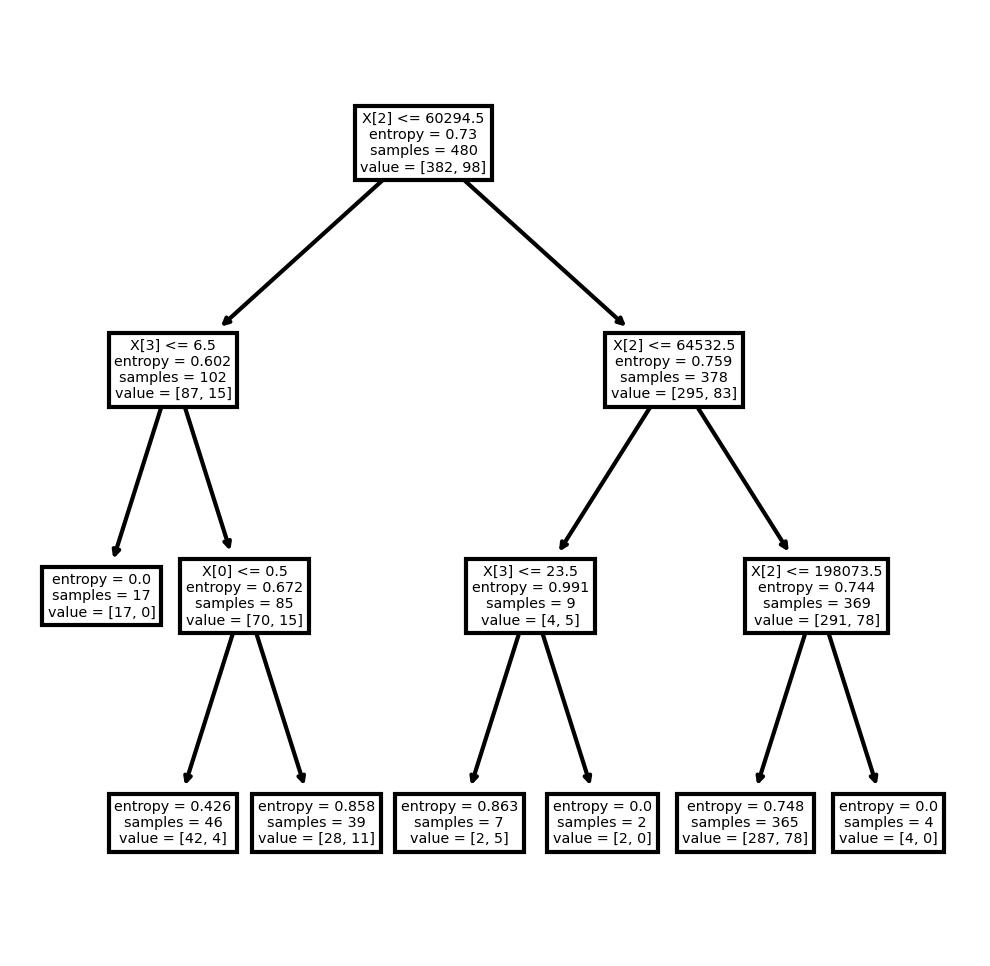

In [18]:
#visulize tree
fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model);

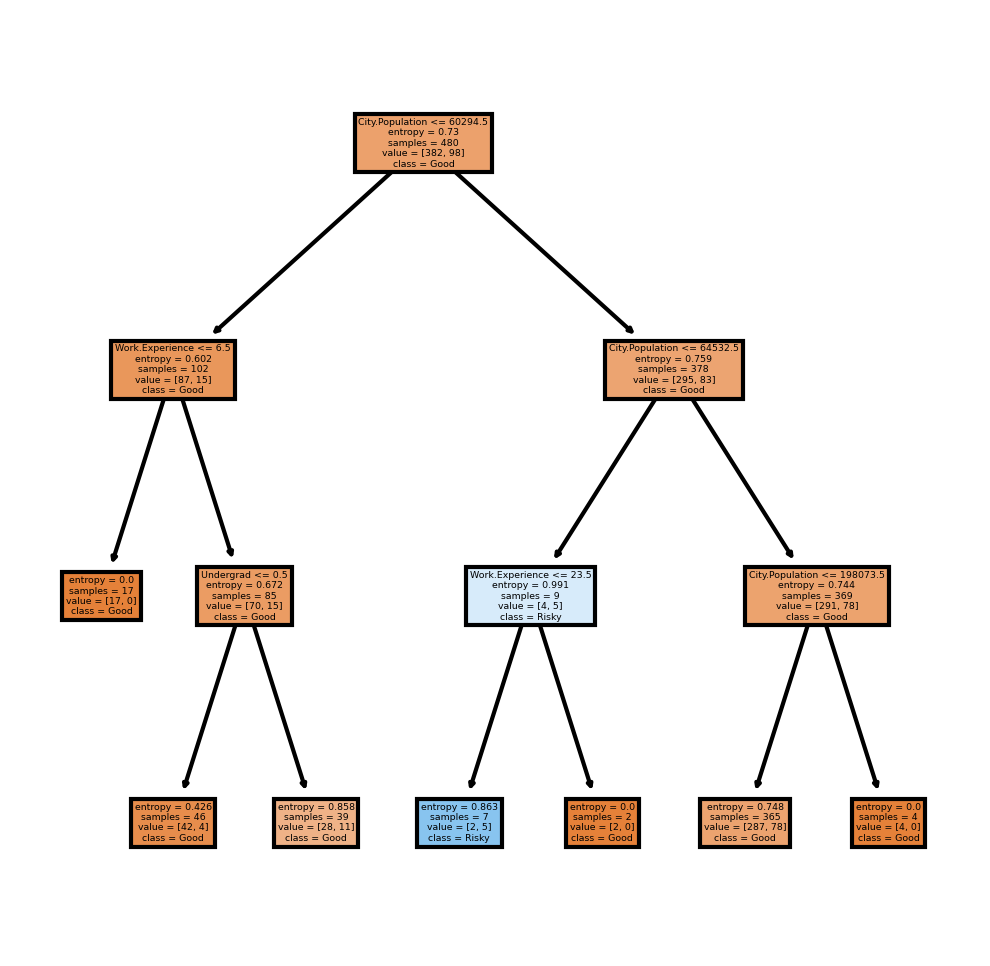

In [20]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['Good','Risky']
fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);


In [21]:
text = tree.export_text(model,max_depth=3)  
print(text) 

|--- feature_2 <= 60294.50
|   |--- feature_3 <= 6.50
|   |   |--- class: Good
|   |--- feature_3 >  6.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: Good
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: Good
|--- feature_2 >  60294.50
|   |--- feature_2 <= 64532.50
|   |   |--- feature_3 <= 23.50
|   |   |   |--- class: Risky
|   |   |--- feature_3 >  23.50
|   |   |   |--- class: Good
|   |--- feature_2 >  64532.50
|   |   |--- feature_2 <= 198073.50
|   |   |   |--- class: Good
|   |   |--- feature_2 >  198073.50
|   |   |   |--- class: Good



In [22]:
model.feature_importances_

array([0.22387639, 0.        , 0.38089844, 0.39522517, 0.        ])

In [23]:
import pandas as pd
feature_imp=pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
feature_imp

Work.Experience    0.395225
City.Population    0.380898
Undergrad          0.223876
Marital.Status     0.000000
Urban              0.000000
dtype: float64

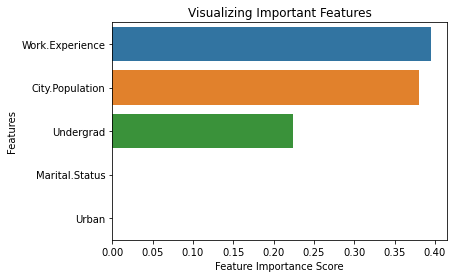

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


In [25]:
#find prediction to use test
preds=model.predict(x_test)
pd.Series(preds).value_counts()

Good     118
Risky      2
dtype: int64

In [26]:
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
    

In [27]:
#create a cross tab
pd.crosstab(y_test,preds)

col_0,Good,Risky
Income,,
Good,92,2
Risky,26,0


In [28]:
# calculate Acuracy
np.mean(preds==y_test)


0.7666666666666667

## Building Decision tree classifier using gini


In [29]:
#create a model
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)
model_gini.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=3)

In [30]:
preds=model_gini.predict(x_test)
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
   

In [31]:
#calculate Accracy
np.mean(preds==y_test)

0.7583333333333333

In [32]:
model_gini.feature_importances_


array([0.13543762, 0.08975191, 0.59895665, 0.17585383, 0.        ])

## Create Regression model


In [33]:
fraud_check1=fraud_check.iloc[:,1:6]
fraud_check1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [34]:
fraud_check1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   City.Population  600 non-null    int64
 3   Work.Experience  600 non-null    int64
 4   Urban            600 non-null    int64
dtypes: int64(5)
memory usage: 23.6 KB


In [35]:
array=fraud_check1.values
X=array[:,0:4]
Y=array[:,4]

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42) 

In [37]:
model1 = DecisionTreeRegressor(max_depth = 3)
model1.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=3)

In [38]:
#compute test score
model1.score(X_test,Y_test)

-0.04564650494329703

In [39]:
#compute Train score
model1.score(X_train,Y_train)


0.06233243527762522